In [11]:
%matplotlib inline

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('white')

## Write final dataset

In [10]:
lut = pd.read_pickle('lang_uri_time_all.pkl.gz', compression='gzip')

## Extra canonization

In [47]:
uri_cov_raw = lut.groupby('uri').source.nunique()
uri_cov_raw.value_counts()

1    94913
2      578
3       25
Name: source, dtype: int64

In [13]:
uri_cov = lut.groupby('uri_cln_unshrtn').source.nunique()
uri_cov.value_counts()

1    80788
2     1084
3       69
4        3
Name: source, dtype: int64

In [ ]:
uri_cov = lut.groupby('uri_cln_unshrtn').source.nunique()
uri_cov.value_counts()

### Check nan values

In [14]:
lut['uri_cln_unshrtn'].isna().count()

354794

In [17]:
lut['uri'].isna().count()

354794

In [15]:
lut['uri_cln_unshrtn'] = lut['uri_cln_unshrtn'].combine_first(lut.uri_cln)

### Check ? and &

In [19]:
uris = lut.uri_cln_unshrtn.drop_duplicates()
uris.head()

0    web.archive.org/web/20150626164255/http://www....
1    web.archive.org/web/20140727005451/http://trav...
2    archive.is/20140828023420/http://www.worldjour...
3    web.archive.org/web/20140803200140/http://www....
4    web.archive.org/web/20140808044248/http://m.al...
Name: uri_cln_unshrtn, dtype: object

In [25]:
uris[uris.str.contains('\?').fillna(False)].shape[0] / uris.shape[0]

0.36066453611768434

In [28]:
amp = uris[uris.str.contains('&').fillna(False)]
amp.shape[0] / uris.shape[0]

0.16537776585104047

In [32]:
lut[lut.uri_cln_unshrtn.isin(amp)].groupby('tld_unshrtn').uri_cln_unshrtn.nunique().sort_values(ascending=False).head(20)

tld_unshrtn
facebook.com         1604
youtube.com          1411
google.co.il         1028
feedsportal.com       706
google.com            422
blogspot.com          271
aljazeera.net         192
msn.com               156
maariv.co.il          155
einnews.com           146
klmty.net             139
ynet.co.il            136
ynetnews.com          112
israelinfo.co.il      106
jpost.com             105
naba.ps                94
jdn.co.il              87
independent.co.uk      83
nytimes.com            81
wn.com                 80
Name: uri_cln_unshrtn, dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [34]:
lut[(lut.uri_cln_unshrtn.isin(amp)) & (lut.tld_unshrtn=='facebook.com')].uri_cln_unshrtn.values

array(['facebook.com/groups/217340461645469/permalink/723892814323562/?comment_id=723949410984569&offset=0&total_comments=58',
       'facebook.com/groups/217340461645469/permalink/723892814323562/?comment_id=723949410984569&offset=0&total_comments=58',
       'facebook.com/photo.php?v=738809832832203&set=vb.296245663755291&type=2&theater',
       ...,
       'facebook.com/permalink.php?id=131839316881537&story_fbid=394920870573379',
       'facebook.com/permalink.php?id=131839316881537&story_fbid=394926540572812',
       'facebook.com/permalink.php?id=131839316881537&story_fbid=394920870573379'],
      dtype=object)

In [44]:
import re
STRIP_AMP_RE = '^([^&]*)&?'
re.search(STRIP_AMP_RE, 'facebook.com/photo.php?v=738809832832203&set=vb.296245663755291&type=2&theater').groups(0)

('facebook.com/photo.php?v=738809832832203',)

In [45]:
lut['uri_remove_amp'] = lut.uri_cln_unshrtn.str.extract(STRIP_AMP_RE)

In [46]:
uri_cov_amp = lut.groupby('uri_remove_amp').source.nunique()
uri_cov_amp.value_counts()

1    76793
2     1206
3      103
4        3
Name: source, dtype: int64

## EDA

In [54]:
uri_cov = lut.groupby('uri_cln_unshrtn').source.nunique()
uri_cov.value_counts()

1    80788
2     1084
3       69
4        3
Name: source, dtype: int64

In [55]:
lut[lut.uri_cln_unshrtn.isin(uri_cov[uri_cov==4].index)].uri_cln_unshrtn.unique()

array(['youtube.com/watch?v=ZbO9tyW5aCU',
       'youtube.com/watch?v=i-uMCUmhXHY',
       'jpost.com/Operation-Protective-Edge/IDF-intensifies-Gaza-attacks-with-artillery-fire-air-strikes-363289'],
      dtype=object)

In [56]:
lut[lut.uri_cln_unshrtn.isin(uri_cov[uri_cov==3].index)].uri_cln_unshrtn.unique()

array(['nymag.com/daily/intelligencer/2014/07/hamas-didnt-kidnap-the-israeli-teens-after-all.html',
       'jpost.com/Operation-Protective-Edge/50-days-of-Israels-Gaza-operation-Protective-Edge-by-the-numbers-372574',
       'timesofisrael.com/name-protective-edge-doesnt-cut-it',
       'timesofisrael.com/israel-pounds-dozens-of-gaza-targets-in-major-counteroffensive',
       'ynetnews.com/articles/0,7340,L-4564678,00.html',
       'jpost.com/Operation-Protective-Edge/Hamas-All-Israelis-now-targets-for-missile-attacks-361965',
       'newsru.co.il/israel/27aug2014/skala_105.html',
       'newsru.co.il/mideast/26aug2014/gaz_601.html',
       'newsru.co.il/mideast/26aug2014/50day_602.html',
       'newsru.co.il/mideast/21aug2014/45day_603.html',
       'newsru.co.il/mideast/20aug2014/44day_106.html',
       'youtube.com/watch?v=QF_pQ0HhN0w',
       'youtube.com/watch?v=h3WW4hNFawA',
       'youtube.com/watch?v=t2w0hncqjZI',
       'newsru.co.il/mideast/21jul2014/14_day_a201.html',
      

In [58]:
lut[lut.uri_cln_unshrtn.isin(uri_cov[uri_cov==2].index)].uri_cln_unshrtn.unique()

array(['jpost.com/Arab-Israeli-Conflict/Report-3-prisoners-captured-in-Operation-Protective-Edge-released-371252',
       'pchrgaza.org/portal/en/index.php?option=com_content&view=article&id=10491:statistics-victims-of-the-israeli-offensive-on-gaza-since-08-july-2014&catid=145:in-focus',
       'ynet.co.il/home/0,7340,L-11584,00.html', ...,
       'svt.se/opinion/gazakriget-startade-1948',
       'eu.wikipedia.org/wiki/Hegi_Babesgarria_operazioa_(2014)',
       'berria.eus/paperekoa/1787/010/001/2014-07-22/etenik_gabeko_odolustea.htm'],
      dtype=object)

In [235]:
tld_counts = (lut.groupby(['source','tld'])
 .uri.nunique()
 .sort_values(ascending=False)
 .unstack(level=0)
 .assign(total=lambda x: x.sum(axis=1))
 .fillna(0)
 .sort_values('total', ascending=False))

tld_counts.head(20)

source,google,twitter,wikipedia,youtube,total
tld,,,,,
fb.me,0.0,20300.0,0.0,6.0,20306.0
bit.ly,0.0,8847.0,0.0,127.0,8974.0
youtube.com,378.0,2440.0,410.0,5399.0,8627.0
dlvr.it,0.0,4956.0,0.0,0.0,4956.0
ow.ly,0.0,2856.0,0.0,0.0,2856.0
wikipedia.org,2089.0,77.0,10.0,6.0,2182.0
goo.gl,0.0,1621.0,0.0,27.0,1648.0
ift.tt,0.0,1607.0,0.0,1.0,1608.0
wp.me,0.0,1300.0,0.0,1.0,1301.0


In [236]:
tld_ratios = tld_counts.drop('total', axis=1).div(tld_counts.drop('total', axis=1).sum(axis=0), axis=1)
tld_ratios['mean'] = tld_ratios.apply(np.mean, axis=1)
tld_ratios = tld_ratios.sort_values('mean', ascending=False).round(2)
tld_ratios.head(30)

source,google,twitter,wikipedia,youtube,mean
tld,,,,,
youtube.com,0.03,0.04,0.05,0.71,0.21
fb.me,0.00,0.31,0.00,0.00,0.08
bit.ly,0.00,0.13,0.00,0.02,0.04
wikipedia.org,0.14,0.00,0.00,0.00,0.04
gulf365.co,0.08,0.00,0.00,0.00,0.02
dlvr.it,0.00,0.07,0.00,0.00,0.02
google.co.il,0.07,0.00,0.00,0.00,0.02
archive.org,0.00,0.00,0.05,0.00,0.01
newsru.co.il,0.00,0.00,0.04,0.00,0.01


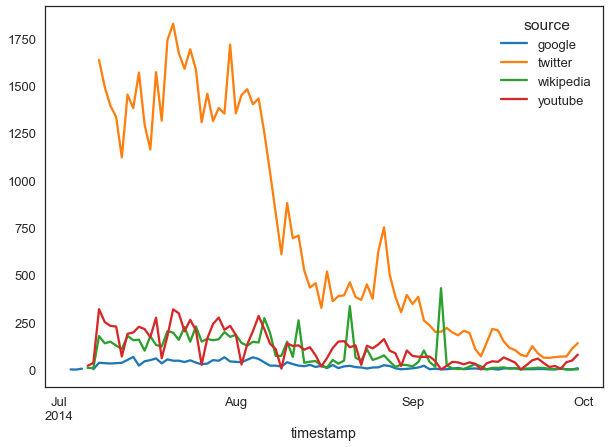

In [252]:
(lut[(lut.source.isin(source_names)) & (lut.timestamp<pd.Timestamp('2014-10-01')) & (lut.timestamp>=pd.Timestamp('2014-07-01'))]
.groupby([pd.Grouper(freq='1d', key='timestamp'), 'source']).uri_cln_unshrtn.nunique().unstack().plot(figsize=(10,7)))

In [238]:
tld_counts_unsh = (lut.groupby(['source','tld_unshrtn'])
 .uri.nunique()
 .sort_values(ascending=False)
 .unstack(level=0)
 .assign(total=lambda x: x.sum(axis=1))
 .fillna(0)
 .sort_values('total', ascending=False))

tld_counts_unsh.head(20)

source,google,twitter,wikipedia,youtube,total
tld_unshrtn,,,,,
facebook.com,48.0,12336.0,9.0,269.0,12662.0
youtube.com,378.0,4398.0,410.0,5501.0,10687.0
wikipedia.org,2089.0,97.0,10.0,7.0,2203.0
independent.co.uk,99.0,1662.0,39.0,2.0,1802.0
feedsportal.com,0.0,1479.0,0.0,0.0,1479.0
gulf365.co,1143.0,0.0,0.0,0.0,1143.0
google.co.il,1026.0,0.0,2.0,0.0,1028.0
linkis.com,0.0,946.0,0.0,0.0,946.0
jpost.com,44.0,631.0,218.0,30.0,923.0


In [62]:
lut_ov = lut[lut.uri_cln_unshrtn.isin(uri_cov[uri_cov>1].index)]

tld_counts_ov = (lut_ov.groupby(['source','tld_unshrtn'])
 .uri_cln_unshrtn.nunique()
 .sort_values(ascending=False)
 .unstack(level=0)
 .assign(total=lambda x: x.sum(axis=1))
 .fillna(0)
 .sort_values('total', ascending=False))

tld_counts_ov.head(20)

source,google,twitter,wikipedia,youtube,total
tld_unshrtn,,,,,
youtube.com,148.0,143.0,45.0,271.0,607.0
independent.co.uk,89.0,103.0,14.0,1.0,207.0
haaretz.com,25.0,60.0,36.0,2.0,123.0
newsru.co.il,18.0,54.0,46.0,0.0,118.0
jpost.com,13.0,41.0,40.0,10.0,104.0
timesofisrael.com,9.0,35.0,31.0,0.0,75.0
ynetnews.com,4.0,32.0,29.0,0.0,65.0
telegraph.co.uk,26.0,28.0,2.0,2.0,58.0
walla.co.il,23.0,27.0,4.0,0.0,54.0


In [64]:
(lut_ov.groupby(['source','tld_unshrtn'])
 .lang.nunique()
 .sort_values(ascending=False)
 .unstack(level=0)
 .assign(total=lambda x: x.sum(axis=1))
 .fillna(0)
 .sort_values('total', ascending=False)).head(20)


source,google,twitter,wikipedia,youtube,total
tld_unshrtn,,,,,
haaretz.com,2.0,5.0,27.0,2.0,36.0
jpost.com,1.0,4.0,29.0,2.0,36.0
timesofisrael.com,2.0,4.0,26.0,0.0,32.0
theguardian.com,1.0,6.0,22.0,2.0,31.0
youtube.com,8.0,7.0,5.0,10.0,30.0
aljazeera.com,0.0,5.0,24.0,0.0,29.0
jewishpress.com,0.0,1.0,27.0,0.0,28.0
ynetnews.com,1.0,4.0,21.0,0.0,26.0
nytimes.com,2.0,5.0,15.0,2.0,24.0


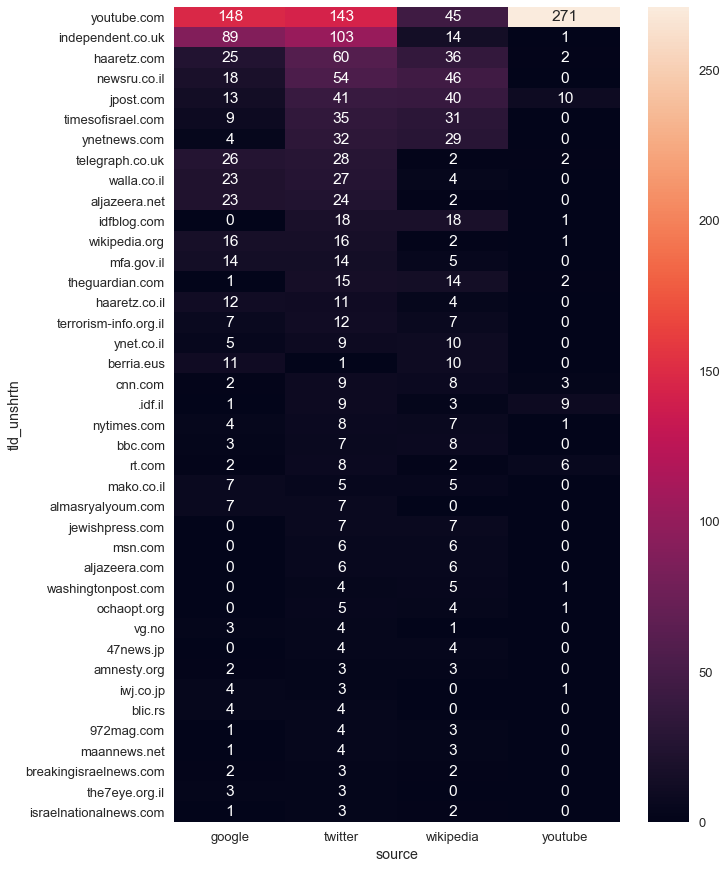

In [65]:
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(tld_counts_ov.drop('total', axis=1).head(40), annot=True, fmt='.0f', ax=ax)

In [241]:
source_langs = lut.groupby(['uri_cln', 'source']).lang.nunique().unstack()
source_langs.head()

source,google,twitter,wikipedia,youtube
uri_cln,,,,
%C2%ABhttp://fr.timesofisrael.com/le-probleme-avec-lunrwa,NaN,NaN,1.0,NaN
%D8%A8%D9%8A%20%D8%A8%D9%8A%20%D8%B3%D9%8A,NaN,NaN,1.0,NaN
%E2%86%91%20%C2%AB%20http://www.unrwa.org/newsroom/press-releases/unrwa-condemns-placement-rockets-second-time-one-its-schools%20%C2%BB%20%5Barchive%5D,NaN,NaN,1.0,NaN
.101hafakot.com,NaN,NaN,NaN,2.0
.AllFriendsofIsrael.com,NaN,NaN,NaN,1.0


In [242]:
source_langs[['wikipedia', 'youtube']].dropna(how='any')

source,wikipedia,youtube
uri_cln,,
actualidad.rt.com/actualidad/view/133389-israel-ejercito-operativo-terrestre-gaza,1.0,1.0
asahi.com/articles/ASG8423CNG84UHBI001.html,1.0,1.0
cnn.com/2014/07/28/world/meast/mideast-crisis,2.0,1.0
cnn.com/2014/07/29/world/meast/mideast-crisis,1.0,1.0
haaretz.com/opinion/.premium-1.604653,1.0,1.0
idf.il/1133-20896-HE/Dover.aspx,1.0,1.0
idf.il/1133-20909-HE/Dover.aspx,1.0,1.0
idfblog.com,3.0,2.0
jpost.com/Operation-Protective-Edge/Hamas-planned-wholesale-slaughter-of-Kibbutz-Sufa-members-says-Peres-363222,2.0,1.0


In [243]:
from itertools import combinations
source_pairs = []
for a, b in combinations(set(source_names), 2):
    cdf = source_langs[[a, b]].dropna(how='any')
    source_pairs.append((a, b, cdf.shape[0]))

source_pairs

[('twitter', 'wikipedia', 332),
 ('twitter', 'google', 192),
 ('twitter', 'youtube', 106),
 ('wikipedia', 'google', 87),
 ('wikipedia', 'youtube', 56),
 ('google', 'youtube', 143)]

In [244]:
df = pd.DataFrame(source_pairs).pivot(index=0, columns=1, values=2)
df

1,google,wikipedia,youtube
0,,,
google,NaN,NaN,143.0
twitter,192.0,332.0,106.0
wikipedia,87.0,NaN,56.0
